In [ ]:
from google.colab import auth
import gspread
from google.auth import default

#autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
import pandas as pd

#defining my woksheet
worksheet = gc.open('Dataset_Ecommerce_ArisCandra').sheet1

#get_all_values gives a list of rows
rows = worksheet.get_all_values()

#convert to a DataFrame Pandas
df = pd.DataFrame(rows)

#membuat row pertama menjadi Head
df.columns  = df.iloc[0]
df = df.iloc[1:]

In [ ]:
df

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
1,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
2,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,$211.00,3,0.03,...,$11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
3,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,$117.00,5,0.01,...,$3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
4,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,$118.00,2,0.05,...,$2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
5,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,$250.00,1,0.04,...,$16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51299,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51300,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51301,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51302,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan


#Data Manipulating

In [ ]:
#converting to date time
df["Order Date"] = pd.to_datetime(df["Order Date"])

#Sorting for data in chronological order
df = df.sort_values(by="Order Date")
df

#menghilangkan $ di kolom sales
df["Sales"] = df["Sales"].str.replace("[^\d.]","",regex = True)

In [ ]:
df

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
25511,FA-2015-4996,2015-01-01,2015-01-07,6,Standard Class,Fashion,Shirts,196.00,4,0.01,...,$10.80,Medium,MS-0015202,Oneill Williams,Consumer,San Salvador,San Salvador,El Salvador,Central,Jan
36000,FA-2015-15485,2015-01-01,2015-01-06,5,Standard Class,Fashion,Formal Shoes,213.00,1,0.02,...,$12.90,Medium,LD-0025691,Bryant Brumfield,Consumer,Dordrecht,South Holland,Netherlands,Central,Jan
38705,FA-2015-18190,2015-01-01,2015-01-10,9,Standard Class,Fashion,Running Shoes,224.00,1,0.05,...,$13.30,Medium,EN-0028396,Carroll Dahlen,Consumer,León,Guanajuato,Mexico,North,Jan
46515,FA-2015-26000,2015-01-01,2015-01-10,9,Standard Class,Fashion,Casula Shoes,122.00,1,0.04,...,$3.70,Medium,GE-0036206,Christian Paige,Corporate,Bradford,England,United Kingdom,North,Jan
26939,FA-2015-6424,2015-01-01,2015-01-04,3,Standard Class,Fashion,Fossil Watch,159.00,4,0.03,...,$6.00,Medium,EN-0016630,Koch Vanderzanden,Home Office,Park Ridge,Illinois,United States,Central,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51291,FA-2015-30776,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Dec
51302,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51292,FA-2015-30777,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51299,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan


In [ ]:
df.info()

#Line Chart

<function matplotlib.pyplot.show(close=None, block=None)>

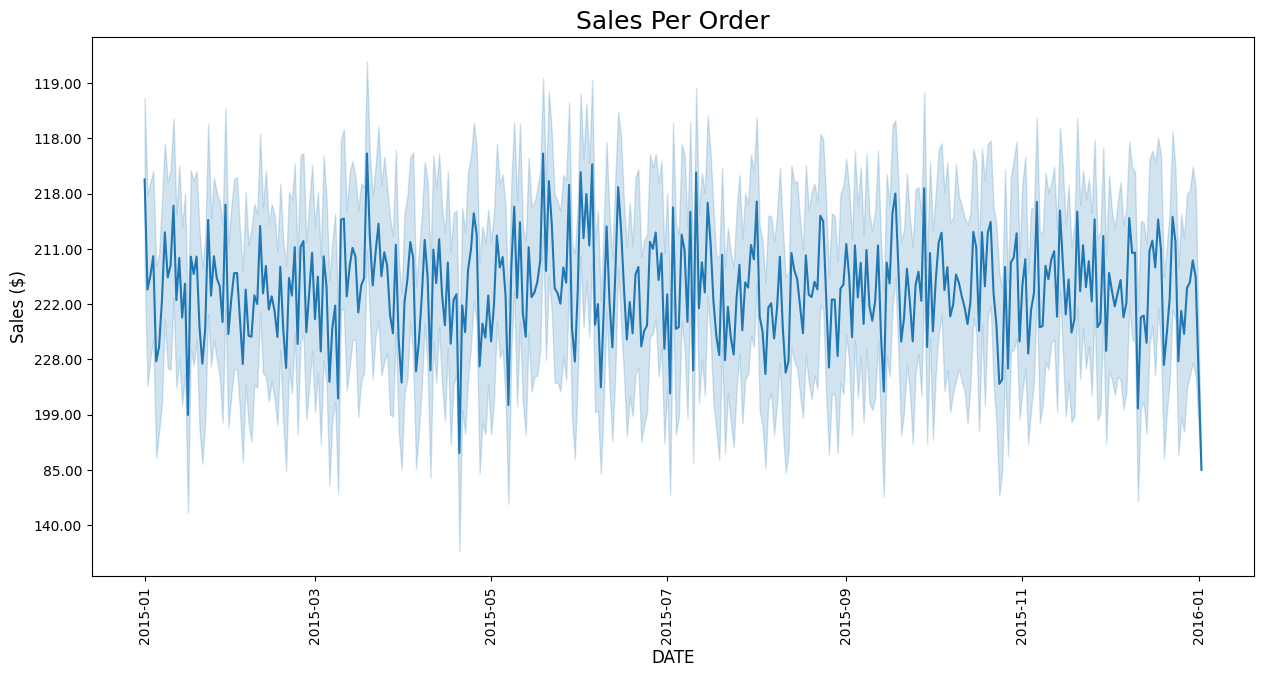

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#figure size in inches
plt.rcParams['figure.figsize'] = 15,7

#rotating x-axis values
plt.xticks(rotation = 'vertical')

#line plot
sns.lineplot(data = df, x='Order Date', y='Sales')

#labeling
plt.title(f"Sales Per Order",fontsize=18)#title
plt.xlabel("DATE",fontsize=12)#x-axis label
plt.ylabel("Sales ($)",fontsize=12)#y-axis label

#showing plot
plt.show

#Pie Chart

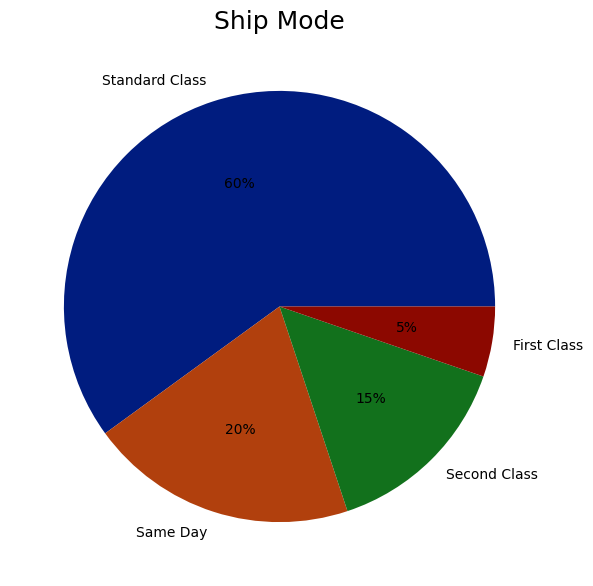

In [ ]:
data = df['Ship Mode'].value_counts()#banyak datanya
keys = df['Ship Mode'].unique() #label

#define Seaborn color palette to use
palette_color = sns.color_palette("dark")

#plotting data on chart
plt.pie(data,labels =keys,colors=palette_color,autopct='%.0f%%')
plt.title(f"Ship Mode",fontsize=18)

#displaying chart
plt.show()

chart diatas menunjukan komposisi ship mode dengan standard class paling banyak dipilih oleh 60% pelanggan

#Bar Chart

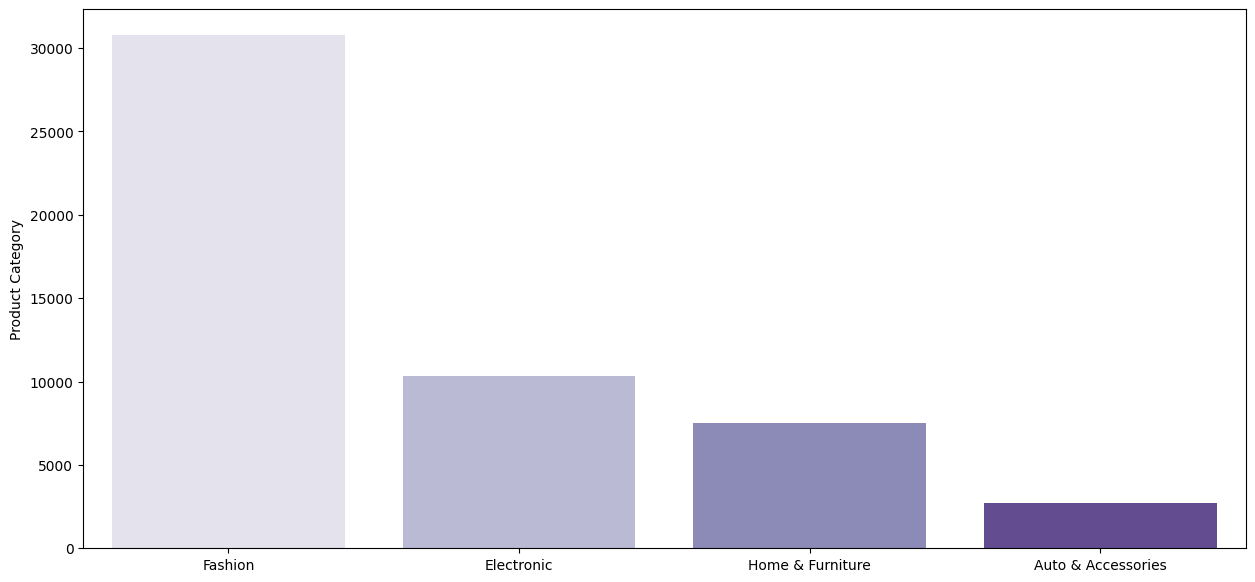

In [ ]:
y = df["Product Category"].value_counts ()
x = df["Product Category"].unique()

#draw bar chart
sns.barplot(x=x,y=y, data = df,palette = "Purples")#Blues, Oranges,Reds

plt.show()

#DS Project - Tugas 1

Buat visualisasi Univariate atau Bivariate dari Dataset diatas (Gunakan Barchar,Pie chart, atau Line Chart) Minimal 5 Visualisasi Selain yang diatas

In [ ]:
#Order Priority
#Segment
#Product
#Country
#ETC

#Jawaban Tugas

untuk pembuatan Tugas ada di link berikut :https://lookerstudio.google.com/u/0/reporting/926851ac-2405-4e23-b14f-c1a0e07dc96c/page/p_vusvuyec7c